# miRe2e

This notebook is a quick guide to use the methods from:

J. Raad, L. A. Bugnon, D. H. Milone and G. Stegmayer, "**miRe2e: a full
end-to-end deep model based on  Transformers for prediction
of pre-miRNAs from raw genome-wide data**", 2021.


## Installation
The package is available in PyPI and uses standard packages from the python ecosystem, thus it is straightforward:

In [1]:
pip install -U miRe2e  > /dev/null

Note: you may need to restart the kernel to use updated packages.


# Quick start
In this demo we will predict pre-miRNAs on H. sapiens chromosome 19. As it will take a while, you can run a fast check of the model using a short input sequence like the following


In [1]:
# Short exerpt of chr19
!wget https://raw.githubusercontent.com/sinc-lab/miRe2e/master/examples/chr19_13836201_13836660_true.fa  > /dev/null

# Notice that the input file is a raw sequence string, like this one
#>chr19
#AGGTCTGATTCTGAGTCCTCATCTCTGCTCCAAGCATCAGCCCACCCAGGGAAGGCAGGG
#GCTGCAGGCTCCAAGGGGGCTTGACCCCTGTTCCTGCTGAACTGAGCCAGTGTACACAAA
#CCAACTGTGTTTCAGCTCAGTAGGCACGGGAGGCAGAGCCCAGGGAGGCCAGGCAGCAGG
#ATGGCAGGCAGACAGGCGGCAGCAGGGGACAGGCGGCAAGGCCAGAGGAGGTGAGGGCCT
#GGGGGGCGGAACTTAGCCACTGTGAACACGACTTGGTGTGGACCCTGCTCACAAGCAGCT
#AAGCCCTGCTCCTCAGGCCAGGCACAGGCTTCGGGGCCTCTCTGCCACCCCGTCCCCGGG
#CAGCATCCTCGGTGGCAGAGCTCAGGGTCGGTTGGAAATCCCTGGCAATGTGATTTGTGA
#CAGGAAGCAAATCCCATCCCCAGGAACCCCAGCCGGCCG

filename = "chr19_13836201_13836660_true.fa"

--2023-07-08 21:08:08--  https://raw.githubusercontent.com/sinc-lab/miRe2e/master/examples/chr19_13836201_13836660_true.fa
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.108.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 474 [text/plain]
Grabando a: «chr19_13836201_13836660_true.fa.6»

chr19_13836201_1383 100%[===================>]     474  --.-KB/s    en 0s      

2023-07-08 21:08:08 (42,3 MB/s) - «chr19_13836201_13836660_true.fa.6» guardado [474/474]



The following runs the prediction on the raw RNA sequence. The input fasta file is analyzed with a sliding window, and a score is obtained for each one.

First, let's load the model. The model has 3 stages:
1.  Structure prediction model: predicts RNA secondary structure using only the input sequence.
2. MFE estimation model: estimates the minimum free energy when folding (MFE) the secondary  structure.
3. Pre-miRNA classifier: uses the input RNA sequence and the outputs of the two previous
  models to give a score to the input sequence in order to determine if it is a  pre-miRNA candidate.  


In [2]:
from miRe2e import MiRe2e

# Create an instance. Pre-trained weights are download by default. New model
# weights can be given as well (see source documentation)
model = MiRe2e()

The ```predict``` method uses the pretrained model to analyze the input fasta and return the scores

In [3]:
scores_5_3, scores_3_5, index = model.predict(filename, batch_size=4096)

# It returns the scores for each window and the position in pb (stored in index)
print()
print(scores_5_3[:3])
print(index[:3])

Loading sequences...
Number of sequences: 36
Done


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


[4.8296736e-04 2.5739661e-07 1.1705596e-03]
['chr19-0-100', 'chr19-20-120', 'chr19-40-140']


# Running pre-miRNAs prediction on the whole H. Sapiens chromosome 19


In [4]:
# Create an instance, this time using GPU
model = MiRe2e(device="cuda")

Because of the computing limitations of this environment, we will download and process only half of the chromosome.

In [ ]:
# Download and unzip file from our repository
!wget https://github.com/sinc-lab/miRe2e/raw/master/examples/chr19_part1.zip > /dev/null
!unzip chr19_part1.zip > /dev/null

Prediction: this can take up to 30 minutes with the Colab GPU

In [5]:
# Run the prediction for this file
scores_5_3, scores_3_5, index = model.predict("chr19_part1.fa", batch_size=4096)

pos = [int(i.split("-")[1])-100 for i in index] # use the start index to plot

Loading sequences...
Number of sequences: 2930880
Done


100%|██████████| 716/716 [17:46<00:00,  1.49s/it]


Using the output scores we can see graphically which are the possible pre-miRNA regions. Index contains the position in base-pairs. Given scores account for the 5'-3' and 3'-5' direction.

Here we use also a reference label file to show the actual positions of well known pre-miRNAs.


In [6]:
import pandas as pd
import numpy as np

# Reference file for ch19
!wget https://github.com/sinc-lab/miRe2e/raw/master/examples/tag_chr19_all.csv > /dev/null
ref = pd.read_csv("tag_chr19_all.csv")

--2023-07-08 21:26:42--  https://github.com/sinc-lab/miRe2e/raw/master/examples/tag_chr19_all.csv
Resolviendo github.com (github.com)... 20.201.28.151
Conectando con github.com (github.com)[20.201.28.151]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Localización: https://raw.githubusercontent.com/sinc-lab/miRe2e/master/examples/tag_chr19_all.csv [siguiendo]
--2023-07-08 21:26:43--  https://raw.githubusercontent.com/sinc-lab/miRe2e/master/examples/tag_chr19_all.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 23447411 (22M) [text/plain]
Grabando a: «tag_chr19_all.csv.3»

tag_chr19_all.csv.3 100%[===================>]  22,36M  5,89MB/s    en 3,8s    

2023-07-08 21:26:48 (5,83 MB/s) - «tag_chr19_all.csv.3» guardado [2

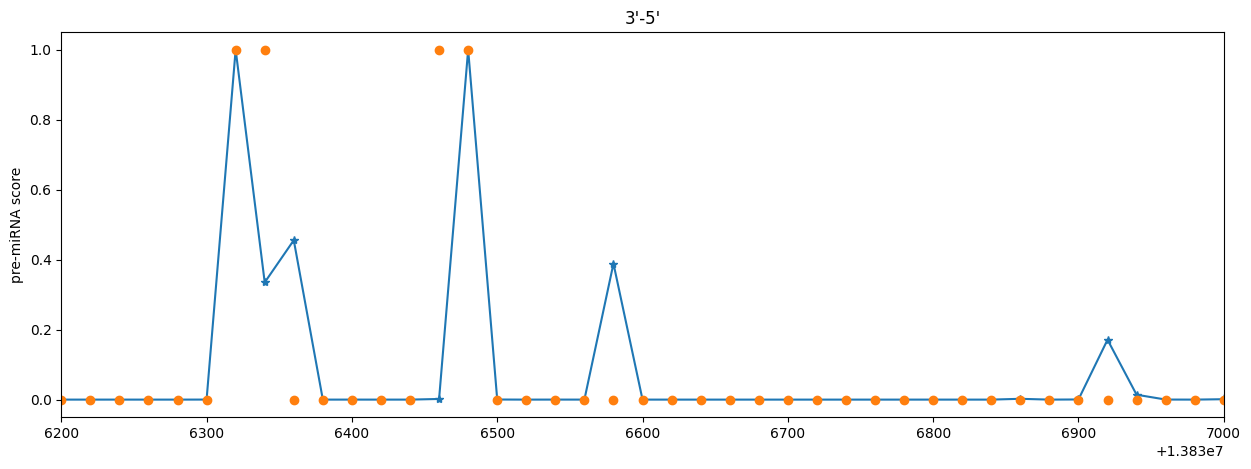

In [7]:
from matplotlib import pyplot as plt

# Plot in the region of hsa-mir-24-2 and hsa-mir-27a (positions 13,836,287 and 13,836,440 of strand 3′ respectively)    
plt.figure(figsize=(15, 5))
plt.plot(pos, scores_3_5, "*-")
plt.plot(pos, ref.loc[:len(pos)-1, "reference_3_5"], "o")
plt.ylabel("pre-miRNA score")
plt.title("3'-5'")
plt.xlim(13836200, 13837000);


In [8]:
# Download and unzip chromosome 19 part 2
!wget https://github.com/sinc-lab/miRe2e/raw/master/examples/chr19_part2.zip
!unzip chr19_part2.zip

scores_5_3_2, scores_3_5_2, index_2 = model.predict("chr19_part2.fa", batch_size=4096)

--2023-07-08 21:26:49--  https://github.com/sinc-lab/miRe2e/raw/master/examples/chr19_part2.zip
Resolviendo github.com (github.com)... 20.201.28.151
Conectando con github.com (github.com)[20.201.28.151]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Localización: https://raw.githubusercontent.com/sinc-lab/miRe2e/master/examples/chr19_part2.zip [siguiendo]
--2023-07-08 21:26:50--  https://raw.githubusercontent.com/sinc-lab/miRe2e/master/examples/chr19_part2.zip
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.111.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 8877967 (8,5M) [application/zip]
Grabando a: «chr19_part2.zip.2»

chr19_part2.zip.2   100%[===================>]   8,47M   533KB/s    en 15s     

2023-07-08 21:27:05 (579 KB/s) - «chr19_part2.zip.2» guardado [8877967

100%|██████████| 716/716 [16:33<00:00,  1.39s/it]


Prediction AUCPR:  0.138


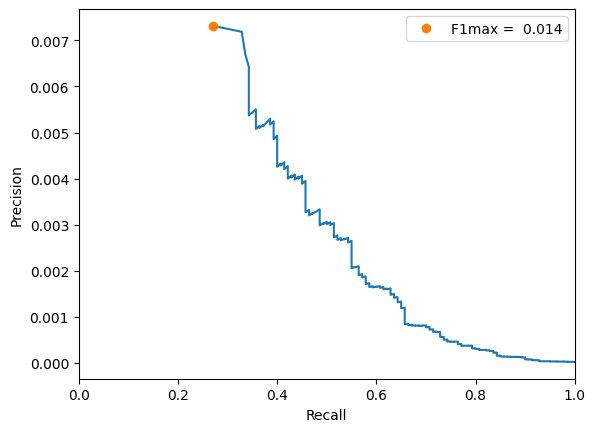

In [ ]:
# Concatenate both parts
index = np.concatenate((index, index_2))
all_scores_5_3 = np.concatenate((scores_5_3, scores_5_3_2))
all_scores_3_5 = np.concatenate((scores_3_5, scores_3_5_2))

# Concatenate 5-3 and 3-5 to match mirna positions
idx = np.concatenate((ref["ind_5_3"], ref["ind_3_5"]))
references = np.concatenate((ref["reference_5_3"], ref["reference_3_5"]))
predictions = np.concatenate((all_scores_5_3, all_scores_3_5))

idx_pos = np.unique(idx[np.where(references==1)])

# Account for overlapped windows with the same pre-mirna
del_pos = []
for j in idx_pos:
    pos = np.where(idx == j)[0]
    max_pos = predictions[pos].max()
    max_id = pos[predictions[pos].argmax()]
    pos = np.delete(pos, np.where(pos == max_id))
    del_pos = np.hstack((del_pos, pos))
del_pos = del_pos.astype(np.int64)
predictions = np.delete(predictions, del_pos)
references = np.delete(references, del_pos)

start, step, end = 0.01, 0.01, 1.0
nn = int((end - start) / step)
th = np.hstack((np.linspace(start, end - step, nn),
                np.array([0.999, 0.9999, 0.99999, 0.999999,
                          0.9999995, 0.9999999])))

from miRe2e.get_error import get_error2d2

auroc, aucpr, f1max, premax, recmax, th, pre, rec = get_error2d2(references,
                                                                 predictions,
                                                                 th,
                                                                 testtime=False)
print(f"Prediction AUCPR: {aucpr: .3f}")

plt.plot(rec[:-1], pre[:-1])
plt.plot(recmax, premax, "o", label=f"F1max = {f1max: .3f}")
plt.xlabel("Recall")
plt.xlim([0, 1])
plt.ylabel("Precision")
plt.legend();